## Explorartoy Data Analysis
Week 3 Notes

Goal:
- Summarize characteristics of data
- Gain a better understanding of the Data Set
- Uncover Relationships
- Extract important variables

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("automobile.csv")

In [3]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Descriptive Statistics

In [4]:
# Automatically compute Basic Stats for numeric dataset
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# Automatically compute amount of each category for categorical dataset
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

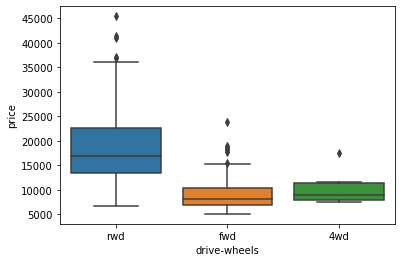

In [9]:
# Box Plots - Distribution of Data
import seaborn as sns
sns.boxplot(x="drive-wheels", y="price", data=df)

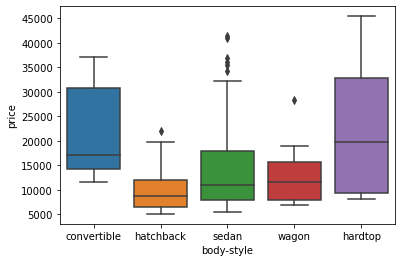

In [10]:
# Example Box Plots Distribution of body style vs price
sns.boxplot(x="body-style", y="price", data=df)

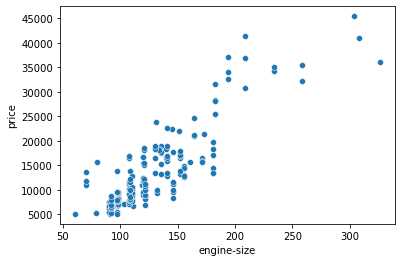

In [15]:
# Scatter Plots (Engine Size vs. Price)
sns.scatterplot(x="engine-size", y="price", data=df, )

Text(0, 0.5, 'Price')

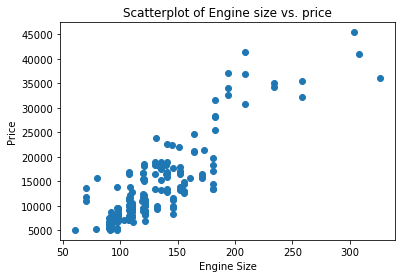

In [18]:
# Scatter Plot using matplotlib
import matplotlib.pyplot as plt
y = df["price"]
x = df["engine-size"]
plt.scatter(x,y)

plt.title("Scatterplot of Engine size vs. price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

### Grouping (GroupBy in Python)

In [19]:
## Use groupby() method on categorical variables
df_test = df[["drive-wheels", "body-style", 'price']]

df_grp = df_test.groupby(["drive-wheels", "body-style"], as_index=False).mean()
df_grp


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [21]:
## Pivot Tables in Pandas
df_pivot = df_grp.pivot(index="drive-wheels", columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

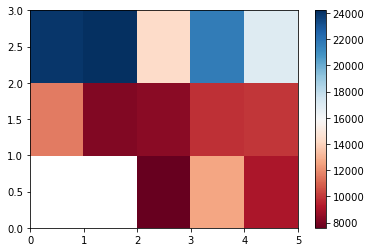

In [23]:
import matplotlib.pyplot as plt

plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

### Correlation

(0.0, 53520.953183790865)

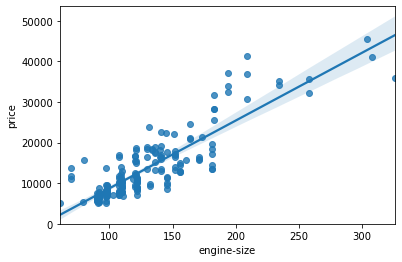

In [25]:
# Positive Correlation
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

(0.0, 48181.55904783065)

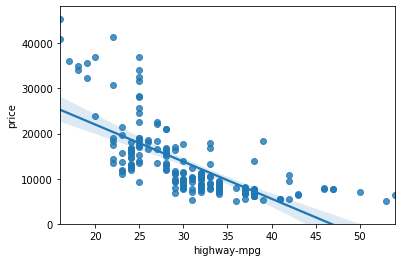

In [26]:
# Negative Correlation
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

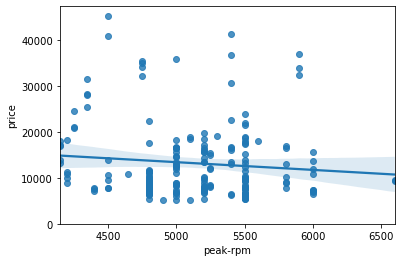

In [27]:
# Weak Correlation
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

### Pearson Correlation
- Correlation Coefficient: Positive or Negative Correlation
- P-Value: Certainty of Correlation (How certain are we of the Correlation Coefficient?)

In [31]:
import scipy.stats as stats
df1 = df.dropna(subset=["horsepower"], axis=0)
pearson_coef, p_value = stats.pearsonr(df1['horsepower'], df1['price'])

In [32]:
pearson_coef

0.8105330821322062

In [33]:
p_value

1.1891278276947142e-47

Since the p value is much smaller than 0.001 and the pearson coef is close to 1 we can say there is a strong positive correlation with a high degree of certainty

In [8]:
## Using a Heat Map for Correlation with the corr function
df_cor = df.corr()
df_cor

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.144324,-0.008245,-0.182196,0.076038,0.280635,-0.035527,0.036233,-0.082391
normalized-losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel-base,-0.535987,-0.074362,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.494884,0.158502,0.250313,0.371621,-0.360593,-0.470606,-0.543304,0.584642
length,-0.365404,0.023220,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610051,0.124139,0.159733,0.580309,-0.286321,-0.665192,-0.698142,0.690628
width,-0.242423,0.105073,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544924,0.188829,0.189867,0.615315,-0.245975,-0.633531,-0.680635,0.751265
height,-0.550160,-0.432335,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.185907,-0.062704,0.259737,-0.087407,-0.311574,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.119893,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644617,0.167562,0.156433,0.758063,-0.279375,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.167365,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.582857,0.209523,0.028889,0.822713,-0.256773,-0.650546,-0.679571,0.872335
bore,-0.144324,-0.036167,0.494884,0.610051,0.544924,0.185907,0.644617,0.582857,1.000000,-0.055390,0.001250,0.568527,-0.277662,-0.592655,-0.599218,0.543436
stroke,-0.008245,0.065627,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.100040,-0.068300,-0.034696,-0.035201,0.082310


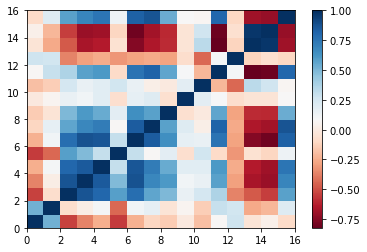

In [7]:
import matplotlib.pyplot as plt

plt.pcolor(df_cor, cmap='RdBu')
plt.colorbar()
plt.show()

## Chi-Square Test for Association
How likely is an observed distribution due to chance?
![Chi Square Formula](Chi2.jpg)

$E_{i}$ is the Expected Value ($\frac{Row Total - Column Total}{Grand Total}$)

$O_{i}$ is the Observed Value

In [1]:
## Cross Tab/ Contingency Tables
stats.chi2_contingency(cont_table, correction = True)

NameError: name 'stats' is not defined